## 1. Env

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import math

## 3-1

In [15]:
def mu_O(a) -> float:
    if 0 <= a and a <= 50:
        return 0
    elif 50 <= a and a <= 70:
        return (a-50)/20
    else:
        return 1

def mu_Y(a) -> float:
    if 0 <= a and a <= 25:
        return 1
    elif 25 <= a and a <= 70:
        return (70-a)/45
    else:
        return 0
    
def mu_W(a) -> float:
    if 0 <= a and a <= 20:
        return 1
    elif 20 <= a and a <= 65:
        return (65-a)/45
    else:
        return 0

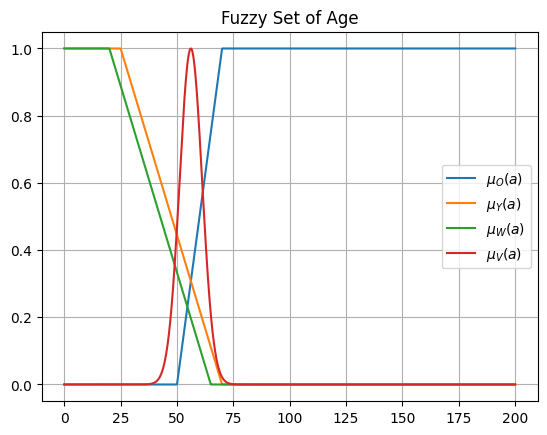

In [22]:
x = np.linspace(0, 200, num=1000)
y1 = np.array([])
y2 = np.array([])
y3 = np.array([])

for item in x:
    y1 = np.append(y1, np.linspace(mu_O(item), mu_O(item), 1))
    y2 = np.append(y2, np.linspace(mu_Y(item), mu_Y(item), 1))
    y3 = np.append(y3, np.linspace(mu_W(item), mu_W(item), 1))

y4 = np.exp(-(x-56.15) ** 2 / (2 * 5 ** 2))
    
plt.plot(x, y1, label=r'$\mu_O(a)$')
plt.plot(x, y2, label=r'$\mu_Y(a)$')
plt.plot(x, y3, label=r'$\mu_W(a)$')
plt.plot(x, y4, label=r'$\mu_V(a)$')

plt.title('Fuzzy Set of Age')

plt.legend()
plt.grid()

plt.show()

## 3-4

In [53]:
A  = np.array([1, 0.5])[:, None]
B  = np.array([0.1, 0.5, 1])[:, None]
C  = np.array([0.2, 1])[:, None]
A1 = np.array([0.8, 0.1])[:, None]
B1 = np.array([0.5, 0.2, 0])[:, None]

In [66]:
def fuzzy_product(A: np.array, B: np.array) -> np.array:
    assert A.shape[1] == B.shape[0]
    res = np.zeros((A.shape[0], B.shape[1]))
    for i in range(A.shape[0]):
        for j in range(B.shape[1]):
            res[i][j] = 0
            for k in range(A.shape[1]):
                res[i][j] = max(res[i][j], min(A[i][k], B[k][j]))
    return res

In [100]:
AB = fuzzy_product(A, B.T).reshape((-1, 1), order='F')
R = fuzzy_product(AB, C.T)
A1B1 = fuzzy_product(A1, B1.T).reshape((-1, 1), order='C').T
C1 = fuzzy_product(A1B1, R)
print(C1)

[[0.1 0.1]]
